In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the feedback CSV into a dataframe.
df = pd.read_csv("Student Feedback Surveys-Superview.csv")
# Normalize and rename dataframe columns for easier accessibility.
df = df.rename(columns={"ID": "id", "Location": "location", "Track": "track", "Week": "week", "Rating (Num)": "rating", "Schedule Pacing": "pacing"})
# Remove data if data lacks a value in rating column.
df = df[df["rating"] != "#ERROR!"]

In [3]:
# Allows easy access to ratings column.
ratings = df.loc[:, "rating"].astype(int)

In [4]:
def assign_category(rating):
    """Assigns a category based on the rating."""
    if 9 <= rating <= 10:
        return "Promoter"
    elif 7 <= rating <= 8:
        return "Passive"
    else:
        return "Detractor"

def calculate_nps(category):
    counts = category.value_counts()
    for _ in ["Promoter", "Passive", "Detractor"]:
        if _ not in counts:
            counts[_] = 0
    # NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)
    nps = (counts["Promoter"] - counts["Detractor"]) / sum(counts)
    return nps

In [5]:
# Creates new category column with respective data.
df["category"] = ratings.apply(assign_category)

In [6]:
# Calculate the NPS using the category column and assign it to a variable.
nps = calculate_nps(df["category"])

### Setup complete, time to answer questions!
Note: Category is used instead of rating for easier data gathering and visualization.

## Q1: How many more promoters are there than detractors across our 2017 data?
Answer: 639

In [7]:
# Get total of each category.
print(df["category"].value_counts())
# Subtract detractors from promoters.
760 - 121

Promoter     760
Passive      569
Detractor    121
Name: category, dtype: int64


639

## Q2: Which track boasts the best promoter-to-detractor ratio?
Answer: VR

In [8]:
# Use cross tabulation to calculate category values and normalize to get percentages.
pd.crosstab(df["track"], df["category"], normalize="index")

category,Detractor,Passive,Promoter
track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


## Q3: Does the student experience get better the longer that they are enrolled at the Summer Academy?
Answer: Based on the graph below, yes.

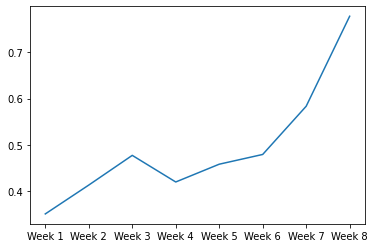

In [9]:
# Create figure with a subplot.
fig, ax = plt.subplots()
# Group week and category columns, aggregate the data, and store within a variable.
aggregate = df.groupby("week")["category"].agg(calculate_nps)
# Generate plot.
ax.plot(aggregate)

## Q4: Does student satisfaction vary by location?
Answer: Based on the table below, yes.

In [10]:
# Use cross tabulation to calculate category values and normalize to get percentages.
pd.crosstab(df["location"], df["category"], normalize="index")

category,Detractor,Passive,Promoter
location,,,
Atlanta,0.000000,0.272727,0.727273
Beijing,0.000000,0.320513,0.679487
Chicago,0.057143,0.414286,0.528571
Hong Kong,0.272727,0.636364,0.090909
Los Angeles,0.047170,0.311321,0.641509
New York City,0.106061,0.412121,0.481818
Oakland,0.042553,0.382979,0.574468
Redwood City,0.086207,0.396552,0.517241
San Francisco,0.086111,0.375000,0.538889


## The rest of the questions.

Q5: What are things we could find here that could “help the business”?

Q6: What sorts of information does this dataset contain?

Q7: What kinds of questions might we be able to answer with this data?

Q8: What kinds of questions can’t we answer with this data?

Q9: What sorts of information might be actionable?

Q10: How can you present your findings in a way that non-technical employees can understand and use to make decisions?